In [1]:
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_csv('data.csv')
df.drop(columns=['Unnamed: 0', 'Link', 'Date-published'], inplace=True)

In [3]:
# Clean Text
def clean_text(text):
    text = re.sub(r'https?\S+', '', text) # Remove hyperlinks
    text = re.sub(r'[^A-Za-z ]+', ' ', text) # Remove non-alphabet characters
    text = ' '.join(text.split()) # Remove whitespace characters
    
    return text

df['Link-text'] = df['Link-text'].apply(clean_text)

# Subjectivity
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Polarity
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

def get_analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

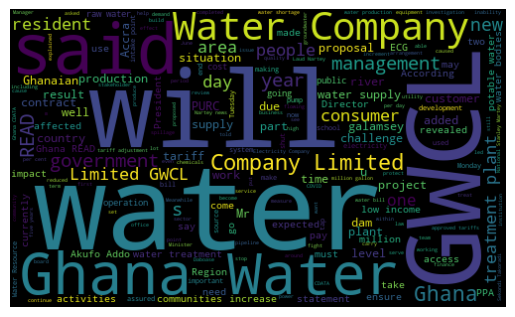

In [4]:
# Visualize
text = ' '.join([text for text in df['Link-text']])

wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(text)
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
# I am interested in articles that are more customer focused but do not want to go through each row of text manually
# Use wordcloud to identify keywords that are customer focused and use for filtering
keywords = 'customer|consumer|supply'
df = df[df['Link-text'].str.contains(keywords, regex=True)]

In [14]:
df['Subjectivity'] = df['Link-text'].apply(get_subjectivity)
df['Polarity'] = df['Link-text'].apply(get_polarity)
df['Analysis'] = df['Polarity'].apply(get_analysis)


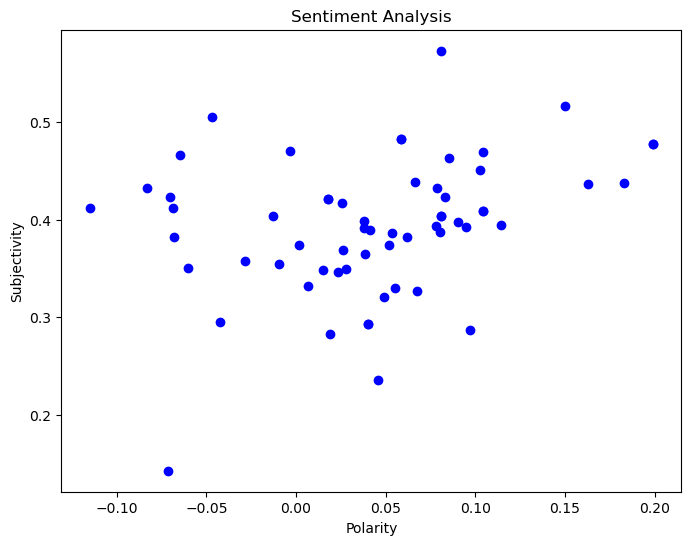

In [18]:
plt.figure(figsize=(8,6))
plt.scatter(df['Polarity'], df['Subjectivity'], color='Blue' ) 

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [17]:
df['Polarity'][0]

0.0384937950937951